# Project:Predict the likelihood of a liability customer buying personal loans

Problem Statement: 

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers 
(while retaining them as depositors). 
A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. 
This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success

Attributes:

ID : Customer ID
    
Age : Customer's age in completed years
    
Experience :years of professional experience
    
Income : Annual income of the customer ($000)
    
ZIP Code : Home Address ZIP code
    
Family : Family size of the customer
    
CCAvg : Avg. spending on credit cards per month ($000)
    
Education : Education Level. 1: Undergrad; 2: Graduate;
3: Advanced/Professional
    
Mortgage : Value of house mortgage if any. ($000)
    
Personal Loan : Did this customer accept the personal loan offered in the
last campaign?

Securities Account : Does the customer have a securities account with the bank?
    
CD Account : Does the customer have a certificate of deposit (CD)
account with the bank?

Online : Does the customer use internet banking facilities?
    
Credit card : Does the customer use a credit card issued by
UniversalBank?

In [375]:
#load  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [376]:
import warnings

In [377]:
#import dataset
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [378]:
df1=df.copy()

In [379]:
df1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [380]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [381]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [382]:
#Analysis of any null values

In [383]:
df1.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

there are no NaN value in dataset

# Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B79E9A5B48>,
      dtype=object)

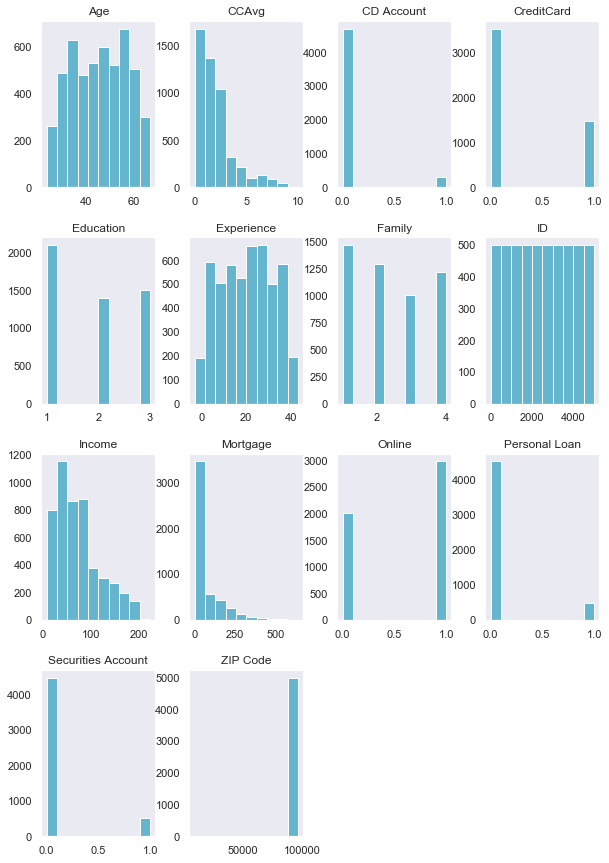

In [384]:
#1 Histogram
df1.hist(figsize=(10,15),color="c",grid=False)

# Analysis of Histogram:
    
1.Target attribute Personal Loan is categorical

2.independent attributes such as CDAccount, credit card, Education, Family, Online are categorical 

3.independent attributes such as Income, Mortgage,CCAvg are right skewed

4.independent attributes such as Age,Experience are Normally ditributed

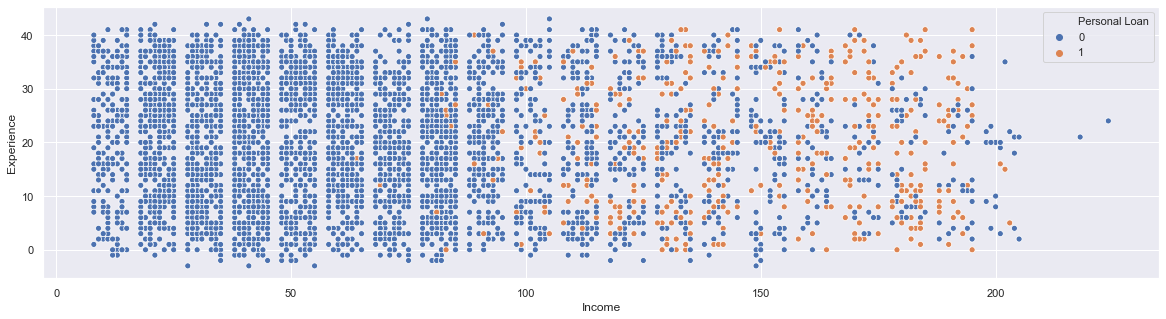

In [294]:
#2 Scatter Plot
plt.subplots(figsize=(20,5))
x=df1['Income']
y=df1['Experience']
sns.scatterplot(x,y,hue="Personal Loan",data=df)

from the scatter plot analysis,

the liability customers who opted for personal loan are those with
Higher Income irrespective of number of years of experience

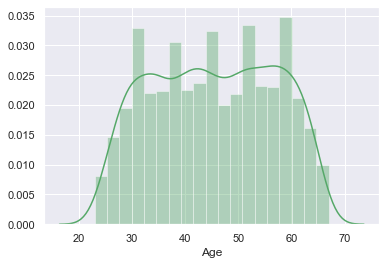

In [295]:
#3 Distplots
sns.distplot(df1['Age'],color="g")

The distribution of Age attribute is near normal distribution

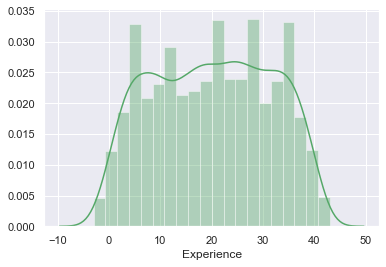

In [296]:
sns.distplot(df1['Experience'],color="g")

The distribution of Experience attribute is near normal distribution

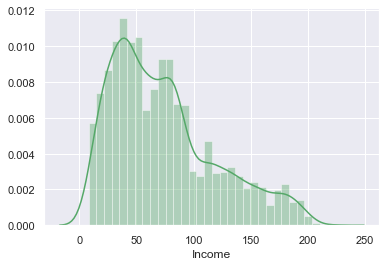

In [297]:
sns.distplot(df1['Income'],color="g")

The distribution of Income attribute is Right skewed

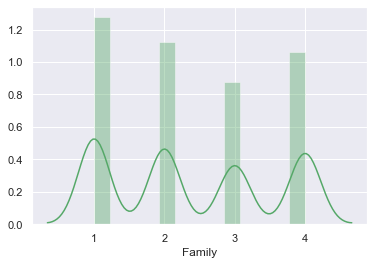

In [298]:
sns.distplot(df1['Family'],color="g")

The distribution of family attribute is categorical

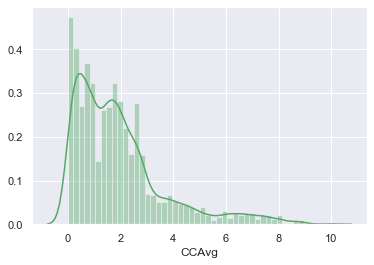

In [299]:
sns.distplot(df1['CCAvg'],color="g")

The distribution of CCavg attribute is right skewed

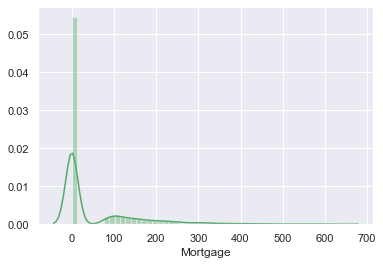

In [300]:
sns.distplot(df1['Mortgage'],color="g")

the distribution of Mortgage is right skewed

# Outlier Analysis

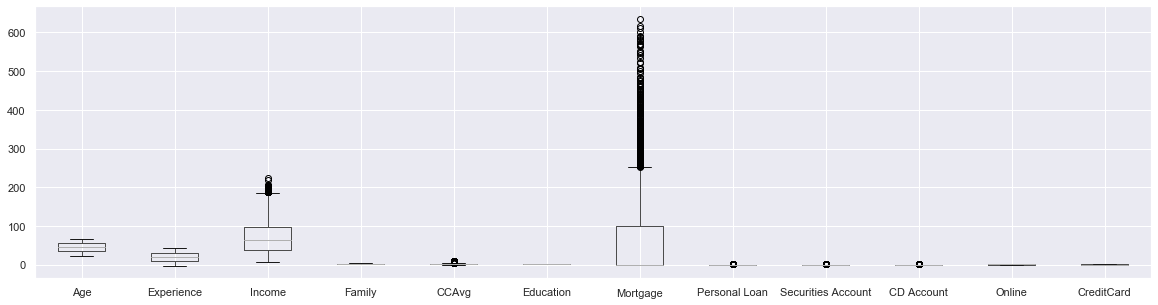

In [301]:
df.boxplot(column=['Age', 'Experience', 'Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard'],figsize=(20,5))

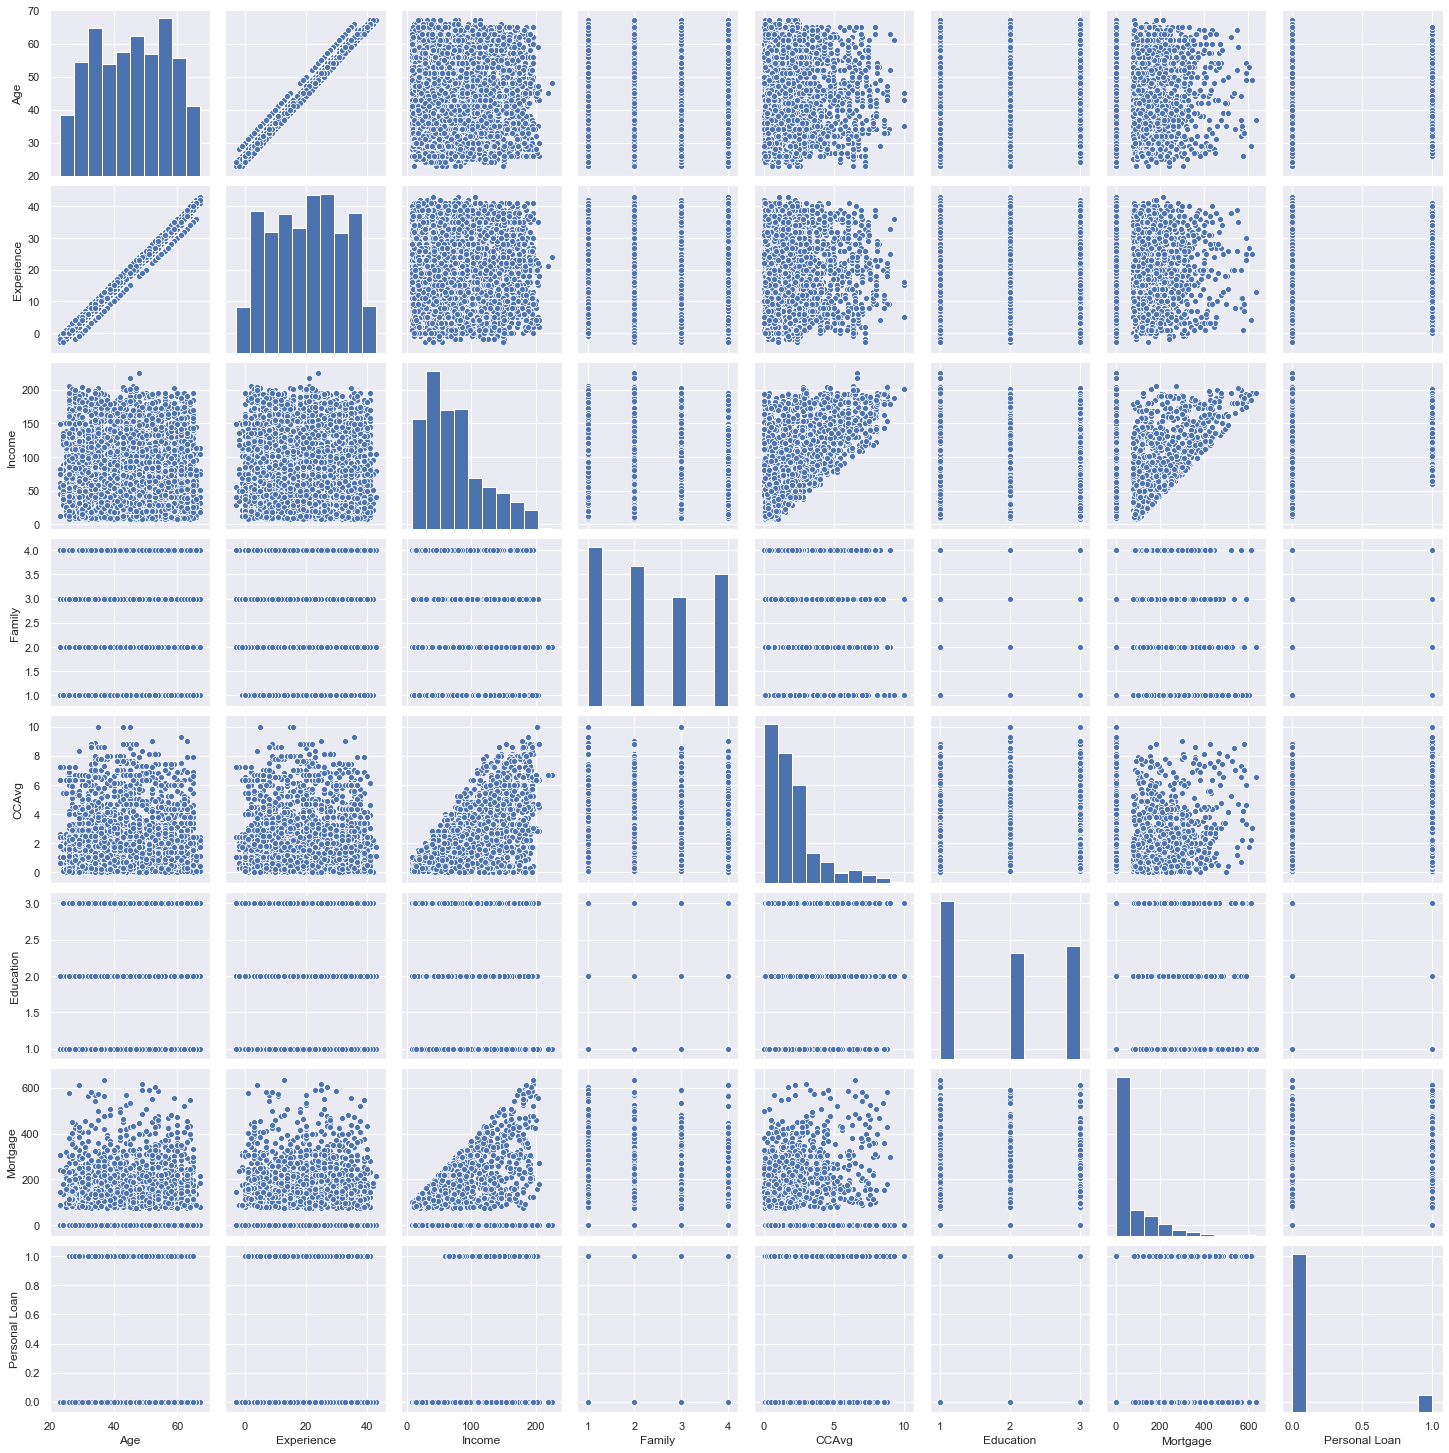

In [187]:
sns.pairplot(df1[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan']])

Analysis of Pairplot
1. Avg. spending on credit cards are(CCAvg) spread under higher income region
2. Income range is spread over all Age and Experience groups  
3. Mortgage values  is spread over higher income region
4. Personal Loan, Mortgage is spread on all Age groups

In [302]:
corr=df1.corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


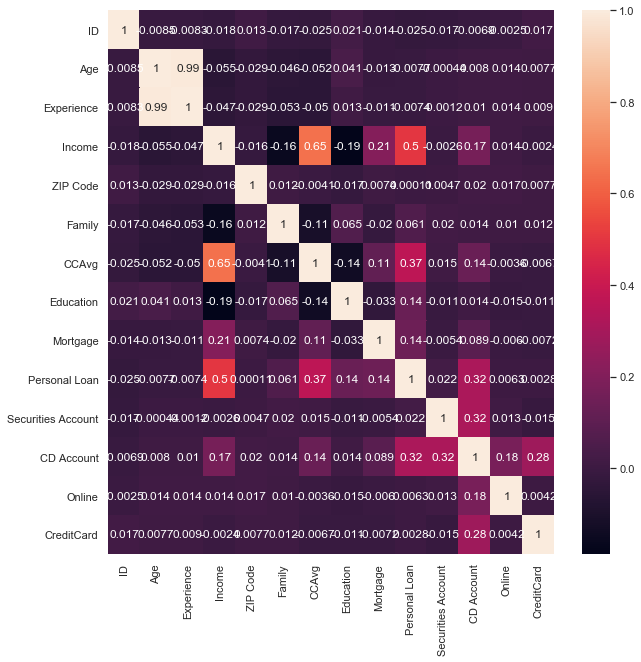

In [303]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr,annot=True)

1.Income has high corelation with  CCAvg (Avg Spending) of 0.65

2.Income has has corelation with  Personal Loan of 0.5

3. Age and Experience has corelation of 0.99

Dropping ID, Zipcode and Experience coloumns as id , zipcode is unique and experience has high co relation with age 

In [385]:
df1.drop('ID',axis=1,inplace=True)
df1.drop('ZIP Code',axis=1,inplace=True)
df1.drop('Experience',axis=1,inplace=True)

In [386]:
df1.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [387]:
# outliers

from the boxplots, we see that outliers exists more in income,mortgage coloumn.

Hence the outliers of these attributes can be replaced such as replace with median or value equal to upper quartiles 

In [388]:
#from scipy import stats

In [389]:
#df1['Income']=np.abs(stats.zscore(df1['Income']))
#df1['CCAvg']=np.abs(stats.zscore(df1['CCAvg']))
#df1['Mortgage']=np.abs(stats.zscore(df1['Mortgage']))

In [390]:
#df1[df1['Mortgage']<3]

In [391]:
from numpy import percentile

In [392]:
#col6: mortgage

In [393]:
x,y=percentile(df1['Mortgage'],25),percentile(df1['Mortgage'],75)

In [394]:
iqr=y-x
cut_off=iqr*1.5
lower=x-cut_off
print('lower:',lower)
upper=y+cut_off
print('upper:',upper)
print('x=%.2f , y=%.2f, iqr=%.2f , cut_off=%.2f ' % (x,y,iqr,cut_off))

lower: -151.5
upper: 252.5
x=0.00 , y=101.00, iqr=101.00 , cut_off=151.50 


In [395]:
outliers1=[i for i in df1['Mortgage'] if i < lower or i > upper ]

In [396]:
#929 can be replaced by upper values of the boxplot. this is equal to capping of the limit of max value.

In [397]:
df1['Mortgage'].replace(outliers1,upper,inplace=True)

In [398]:
#Seperate the Target and Input attributes.

In [399]:
Y=df1['Personal Loan']
X=df1.drop('Personal Loan',axis=1)

# Train_test_split

In [400]:
#Train_test_split
#import libraries 

from sklearn.model_selection import train_test_split

In [401]:
test_size=0.30 #split the data set into 70:30 ratio.
X_Train,X_Test,y_train,y_test=train_test_split(X,Y,test_size=test_size,random_state=10)
print('X_Train:',len(X_Train))
print('X_Test :', len(X_Test))
print('y_train:',len(y_train))
print('y_test :', len(y_test))

X_Train: 3500
X_Test : 1500
y_train: 3500
y_test : 1500


Applying standard scaler

In [402]:
from sklearn.preprocessing  import StandardScaler

In [403]:
Xtrain_sd = StandardScaler().fit_transform(X_Train)
Xtest_sd = StandardScaler().fit_transform(X_Test)

# Models

In [404]:
#import library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [405]:
from sklearn.metrics import roc_curve,auc

#1.Logistic Regression

In [406]:
LRmodel = LogisticRegression()
LRmodel.fit(Xtrain_sd,y_train)
y_predict = LRmodel.predict(Xtest_sd)
model_score=LRmodel.score(Xtrain_sd,y_train)
model_score1 = LRmodel.score(Xtest_sd, y_test)
print('Train:',model_score)
print('Test:',model_score1)
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_predict))

Train: 0.95
Test: 0.9553333333333334
Confusion Matrix: 
 [[1346   14]
 [  53   87]]


In [407]:
# evaluate accuracy
print('Accuracy:',accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))

Accuracy: 0.9553333333333334
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1360
           1       0.86      0.62      0.72       140

    accuracy                           0.96      1500
   macro avg       0.91      0.81      0.85      1500
weighted avg       0.95      0.96      0.95      1500



In [408]:
lrmodel=LRmodel.predict_proba(Xtest_sd)
fpr1,tpr1,threshold=roc_curve(y_test,lrmodel[:,1])
roc_auc2=auc(fpr1,tpr1)
print("area: %f" % roc_auc2)

area: 0.950956


#2.Naive Bayes

In [409]:
from sklearn.naive_bayes import GaussianNB

In [410]:
clf = GaussianNB()
clf.fit(X_Train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [411]:
y_predict= clf.predict(Xtest_sd)
model_score=clf.score(Xtrain_sd,y_train)
print('Train:',model_score)
model_score1=clf.score(Xtest_sd,y_test)
print('Test:',model_score1)

Train: 0.8997142857142857
Test: 0.8993333333333333


In [412]:
print('Accuracy:',accuracy_score(y_test,y_predict))
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

Accuracy: 0.8993333333333333
Confusion Matrix: 
 [[1307   53]
 [  98   42]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1360
           1       0.44      0.30      0.36       140

    accuracy                           0.90      1500
   macro avg       0.69      0.63      0.65      1500
weighted avg       0.88      0.90      0.89      1500



In [413]:
NBmodel=clf.predict_proba(Xtest_sd)
fpr2,tpr2,threshold=roc_curve(y_test,NBmodel[:,1])
roc_auc3=auc(fpr2,tpr2)
print("area: %f" % roc_auc3)

area: 0.759380


#3.K-NN

In [414]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knnmodel = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knnmodel.fit(Xtrain_sd, y_train)

# predict the response
y_predict = knnmodel.predict(Xtest_sd)

model_score=knnmodel.score(Xtrain_sd,y_train)
model_score1=knnmodel.score(Xtest_sd,y_test)
print('Train score:',model_score)
print('Test score',model_score1)
# evaluate accuracy
print('Accuracy score: ',accuracy_score(y_test, y_predict))
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_predict))
print(classification_report(y_test,y_predict))

Train score: 0.9785714285714285
Test score 0.9706666666666667
Accuracy score:  0.9706666666666667
Confusion Matrix: 
 [[1355    5]
 [  39  101]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1360
           1       0.95      0.72      0.82       140

    accuracy                           0.97      1500
   macro avg       0.96      0.86      0.90      1500
weighted avg       0.97      0.97      0.97      1500



In [415]:
knn=knnmodel.predict_proba(Xtest_sd)
fpr3,tpr3,threshold=roc_curve(y_test,knn[:,1])
roc_auc4=auc(fpr3,tpr3)
print("area: %f" % roc_auc4)

area: 0.919493


In [416]:
# instantiate learning model (k = 5)
knnmodel = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knnmodel.fit(Xtrain_sd, y_train)

# predict the response
y_predict = knnmodel.predict(Xtest_sd)

model_score=knnmodel.score(Xtrain_sd,y_train)
model_score1=knnmodel.score(Xtest_sd,y_test)
print('Train score:',model_score)
print('Test score',model_score1)
# evaluate accuracy
print('Accuracy score: ',accuracy_score(y_test, y_predict))
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

Train score: 0.9722857142857143
Test score 0.9653333333333334
Accuracy score:  0.9653333333333334
Confusion Matrix: 
 [[1357    3]
 [  49   91]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1360
           1       0.97      0.65      0.78       140

    accuracy                           0.97      1500
   macro avg       0.97      0.82      0.88      1500
weighted avg       0.97      0.97      0.96      1500



In [417]:
knn5=knnmodel.predict_proba(Xtest_sd)
fpr4,tpr4,threshold=roc_curve(y_test,knn5[:,1])
roc_auc5=auc(fpr4,tpr4)
print("area: %f" % roc_auc5)

area: 0.942198


#4.SVM

In [424]:
from sklearn.svm import SVC
svc_model= SVC(kernel='linear',probability=True)
svc_model.fit(Xtrain_sd,y_train)
prediction = svc_model.predict(Xtest_sd)
model_score=svc_model.score(Xtrain_sd,y_train)
model_score1=svc_model.score(Xtest_sd,y_test)
print('Train score:',model_score)
print('Test score:',model_score1)

Train score: 0.9514285714285714
Test score: 0.9546666666666667


In [425]:
# evaluate accuracy
print('Accuracy score: ',accuracy_score(y_test,prediction))
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test,prediction))
print(classification_report(y_test, y_predict))

Accuracy score:  0.9546666666666667
Confusion Matrix: 
 [[1350   10]
 [  58   82]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1360
           1       0.97      0.65      0.78       140

    accuracy                           0.97      1500
   macro avg       0.97      0.82      0.88      1500
weighted avg       0.97      0.97      0.96      1500



In [426]:
svc1=svc_model.predict_proba(Xtest_sd)
fpr5,tpr5,threshold=roc_curve(y_test,svc1[:,1])
roc_auc6=auc(fpr5,tpr5)
print("area: %f" % roc_auc6)

area: 0.949259


In [427]:
from sklearn.svm import SVC
svc_model= SVC(kernel='rbf',probability=True)
svc_model.fit(Xtrain_sd,y_train)
prediction = svc_model.predict(Xtest_sd)
model_score=svc_model.score(Xtrain_sd,y_train)
model_score1=svc_model.score(Xtest_sd,y_test)
print('Train score:',model_score)
print('Test score:',model_score1)

Train score: 0.9837142857142858
Test score: 0.9766666666666667


In [428]:
# evaluate accuracy
print('Accuracy score: ',accuracy_score(y_test,prediction))
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test,prediction))
print(classification_report(y_test, y_predict))

Accuracy score:  0.9766666666666667
Confusion Matrix: 
 [[1356    4]
 [  31  109]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1360
           1       0.97      0.65      0.78       140

    accuracy                           0.97      1500
   macro avg       0.97      0.82      0.88      1500
weighted avg       0.97      0.97      0.96      1500



In [429]:
svc2=svc_model.predict_proba(Xtest_sd)
fpr6,tpr6,threshold=roc_curve(y_test,svc2[:,1])
roc_auc7=auc(fpr6,tpr6)
print("area: %f" % roc_auc7)

area: 0.982274


# Inference

Accuracy of  SVM model scored better of about 97% accuracy with RBF kernel.

Confusion Matrix The False negative is just 31 as less the number of False Negatives, better model we will design

Recall score 65% for class 1 ( this says about 
buyer loan prediction that is out of total number of customers who actually bought personal loans
our model is about to idntlfy 65 % of them.)